# CAT DOG CLASSIFIER

# Activate tensor first and after do it

In [1]:
import os, shutil

In [2]:
import tensorflow

## Step 1: Create Directories for training and vallidationn and testing

In [20]:
original_dataset_dir="C:/Users/praka/Documents/Devid Pratap Sir/mlops_1,2/mlops_1,2/kaggle_original_data/train"

In [21]:
base_dir="C:/Users/praka/Documents/Devid Pratap Sir/mlops_1,2/mlops_1,2/cat_dogs_small"
os.mkdir(base_dir)

In [22]:
train_dir="C:/Users/praka/Documents/Devid Pratap Sir/mlops_1,2/mlops_1,2/cat_dogs_small/train"
os.mkdir(train_dir)

In [23]:
validation_dir="C:/Users/praka/Documents/Devid Pratap Sir/mlops_1,2/mlops_1,2/cat_dogs_small/validation"
os.mkdir(validation_dir)

In [24]:
test_dir="C:/Users/praka/Documents/Devid Pratap Sir/mlops_1,2/mlops_1,2/cat_dogs_small/test"
os.mkdir(test_dir)

In [25]:
train_cats_dir="C:/Users/praka/Documents/Devid Pratap Sir/mlops_1,2/mlops_1,2/cat_dogs_small/train/cats"
os.mkdir(train_cats_dir)

In [26]:
validation_cats_dir="C:/Users/praka/Documents/Devid Pratap Sir/mlops_1,2/mlops_1,2/cat_dogs_small/validation/cats"
os.mkdir(validation_cats_dir)

In [27]:
test_cats_dir="C:/Users/praka/Documents/Devid Pratap Sir/mlops_1,2/mlops_1,2/cat_dogs_small/test/cats"
os.mkdir(test_cats_dir)

In [28]:
train_dogs_dir="C:/Users/praka/Documents/Devid Pratap Sir/mlops_1,2/mlops_1,2/cat_dogs_small/train/dogs"
os.mkdir(train_dogs_dir)

In [29]:
validation_dogs_dir="C:/Users/praka/Documents/Devid Pratap Sir/mlops_1,2/mlops_1,2/cat_dogs_small/validation/dogs"
os.mkdir(validation_dogs_dir)

In [30]:
test_dogs_dir="C:/Users/praka/Documents/Devid Pratap Sir/mlops_1,2/mlops_1,2/cat_dogs_small/test/dogs"
os.mkdir(test_dogs_dir)

In [31]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [32]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [33]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames=['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [34]:
fnames=['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames=['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [35]:
print("No.of training cat images =",len(os.listdir(train_cats_dir)))
print("No.of validation cat images =",len(os.listdir(validation_cats_dir)))
print("No.of testing cat images =",len(os.listdir(test_cats_dir)))
print("No.of training dog images =",len(os.listdir(train_dogs_dir)))
print("No.of validation dog images =",len(os.listdir(validation_dogs_dir)))
print("No.of testing dog images =",len(os.listdir(test_dogs_dir)))

No.of training cat images = 1000
No.of validation cat images = 500
No.of testing cat images = 500
No.of training dog images = 1000
No.of validation dog images = 500
No.of testing dog images = 500


# Step2: Instantiate a CNN Model

In [36]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [37]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [39]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.0002),
             metrics=['acc'])

##  Preprocesses the Training and Validation images

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

validation_generator=test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [42]:
history=model.fit(
train_generator,
steps_per_epoch=100,
epochs=70,                      # increes the number to 30 to 74 And increes the validation_steps also
validation_data=validation_generator,
validation_steps=50)

Epoch 1/70
100/100 [==============================] - 173s 2s/step - loss: 0.6233 - acc: 0.6650 - val_loss: 0.6099 - val_acc: 0.6600
Epoch 2/70
100/100 [==============================] - 172s 2s/step - loss: 0.5688 - acc: 0.7135 - val_loss: 0.5826 - val_acc: 0.6940
Epoch 3/70
100/100 [==============================] - 167s 2s/step - loss: 0.5327 - acc: 0.7325 - val_loss: 0.6365 - val_acc: 0.6530
Epoch 4/70
100/100 [==============================] - 172s 2s/step - loss: 0.5079 - acc: 0.7525 - val_loss: 0.5933 - val_acc: 0.6830
Epoch 5/70
100/100 [==============================] - 166s 2s/step - loss: 0.4654 - acc: 0.7760 - val_loss: 0.5631 - val_acc: 0.7080
Epoch 6/70
100/100 [==============================] - 169s 2s/step - loss: 0.4350 - acc: 0.7915 - val_loss: 0.5585 - val_acc: 0.7120
Epoch 7/70
100/100 [==============================] - 172s 2s/step - loss: 0.4018 - acc: 0.8220 - val_loss: 0.6093 - val_acc: 0.7120
Epoch 8/70
100/100 [==============================] - 165s 2s/step - 

# hare need to the runn in file is minist fule

In [43]:
# evaluate the metrics 
def plot_metrics(history):
    import matplotlib.pyplot as plt
    acc=history.history['acc']
    val_acc=history.history['val_acc']
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    
    epochs=range(1, len(acc)+1)
    plt.plot(epochs, acc,'bo', label='Training Accuracy')
    plt.plot(epochs, val_acc,'b', label='Validation Accuaracy')
    plt.title("Training vs Validation Accuracy")
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo',label='Training Loss')
    plt.plot(epochs, val_loss,'b', label='Validation Loss')
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.show()

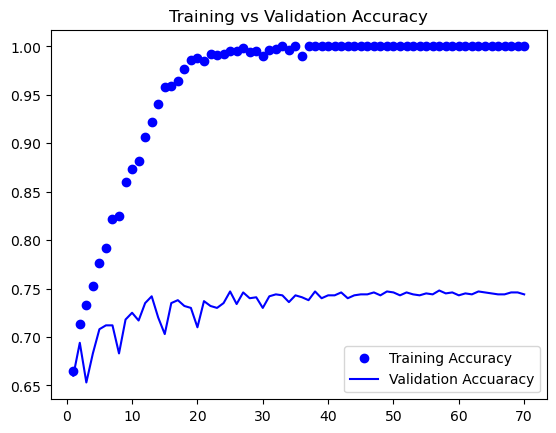

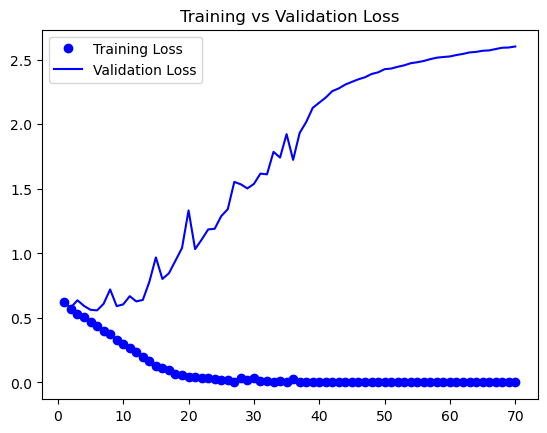

In [44]:
plot_metrics(history)

In [45]:
model.save('cats_dogs_small_1.h5')

In [54]:
file="C:/Great Leaks Study/Devid Pratap Sir/demo_mlops/demo_mlops/mlops_1,2/mlops_1,2/dog.2203.jpg"

In [55]:
#file="C:/Great Leaks Study/Devid Pratap Sir/demo_mlops/demo_mlops/mlops_1,2/mlops_1,2/cat.123.jpg"

In [56]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

1/1 [==============================] - 0s 107ms/step
DOG


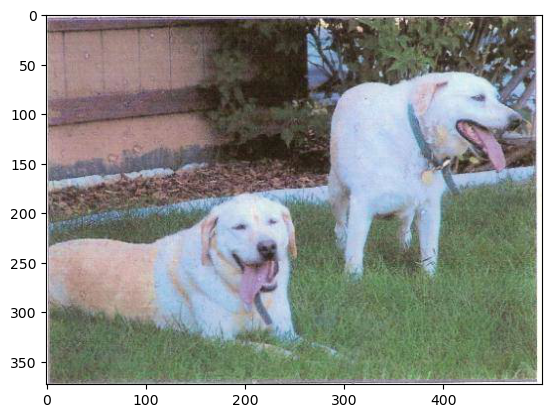

In [57]:
from PIL import Image
image=Image.open(file)
plt.imshow(image)
image=load_img(file, target_size=(150, 150))
image=img_to_array(image)
image=np.expand_dims(image, axis=0)
model='cats_dogs_small_1.h5'
model=load_model(model)
pred=int(model.predict(image)[0][0])
if pred==1:
    print("DOG")
else:
    print('CAT')

The model is cleaerly overfitting and needs to retrained with Data Augmentation

# Modelling with Data Augmentation

In [58]:
def create_model():  # create the different model
    model = Sequential()
    #Convolution
    model.add(Conv2D(32, (3,3), input_shape=(150,150,3), activation='relu'))
    model.add(MaxPooling2D(2,2))

    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))

    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))

    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))

    #Flattening
    model.add(Flatten())
    #Dense
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = RMSprop(learning_rate=0.0002), metrics=['acc'])
    return model

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

# Modelling with Data Augumentation
Data Augmentation is a process to create more samples by performing transformation on images like vertical shift, shearing, rotation etc. It is used fo two purposes:

To increase the samppe size for smaller datsets
To regularize the model to prevent overfitting

# Data Augmentation steps
rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures
width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.
shear_range is for randomly applying shearing transformations
zoom_range is for randomly zooming inside pictures
horizontal_flip is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).
fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=50,
        width_shift_range=0.4,
        height_shift_range=0.4,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


test_datagen=ImageDataGenerator(rescale=1./255) #validation pictures are not to be augumented

train_generator=train_datagen.flow_from_directory(train_dir,
                                                 batch_size=20,
                                                 target_size=(150,150),
                                                 class_mode='binary')


validation_generator=test_datagen.flow_from_directory(validation_dir,
                                                 batch_size=20,
                                                 target_size=(150,150),
                                                 class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [61]:
model_with_aug=create_model()

In [62]:
model_with_aug.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [63]:
history=model_with_aug.fit(
train_generator,
steps_per_epoch=100,
epochs=70,                      # increes the number to 30 to 74 And increes the validation also
validation_data=validation_generator,
validation_steps=50)

Epoch 1/70
100/100 [==============================] - 56s 549ms/step - loss: 0.6976 - acc: 0.4985 - val_loss: 0.6975 - val_acc: 0.5000
Epoch 2/70
100/100 [==============================] - 58s 581ms/step - loss: 0.6917 - acc: 0.5155 - val_loss: 0.6890 - val_acc: 0.5000
Epoch 3/70
100/100 [==============================] - 57s 571ms/step - loss: 0.6819 - acc: 0.5530 - val_loss: 0.6660 - val_acc: 0.5940
Epoch 4/70
100/100 [==============================] - 60s 602ms/step - loss: 0.6741 - acc: 0.5690 - val_loss: 0.7150 - val_acc: 0.5210
Epoch 5/70
100/100 [==============================] - 60s 602ms/step - loss: 0.6685 - acc: 0.5830 - val_loss: 0.6530 - val_acc: 0.5980
Epoch 6/70
100/100 [==============================] - 61s 610ms/step - loss: 0.6661 - acc: 0.5850 - val_loss: 0.6470 - val_acc: 0.6010
Epoch 7/70
100/100 [==============================] - 63s 625ms/step - loss: 0.6600 - acc: 0.5860 - val_loss: 0.7664 - val_acc: 0.5030
Epoch 8/70
100/100 [==============================] - 6

In [66]:
# evaluate the metrics 
def plot_metrics(history):
    import matplotlib.pyplot as plt
    acc=model_with_aug.history.history['acc']
    val_acc=model_with_aug.history.history['val_acc']
    loss=model_with_aug.history.history['loss']
    val_loss=model_with_aug.history.history['val_loss']
    
    epochs=range(1, len(acc)+1)
    plt.plot(epochs, acc,'bo', label='Training Accuracy')
    plt.plot(epochs, val_acc,'b', label='Validation Accuaracy')
    plt.title("Training vs Validation Accuracy")
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo',label='Training Loss')
    plt.plot(epochs, val_loss,'b', label='Validation Loss')
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.show()

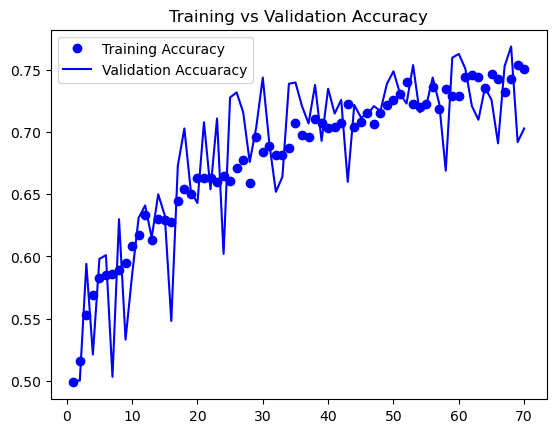

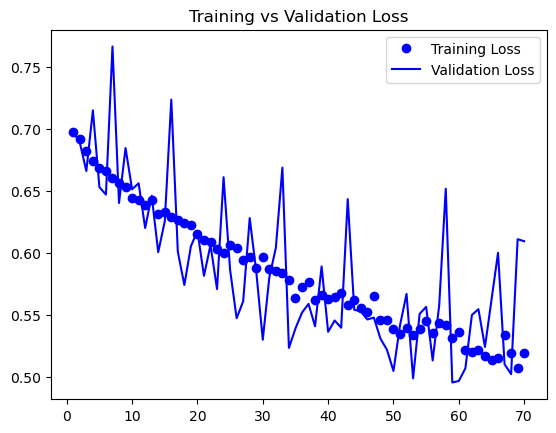

In [67]:
plot_metrics(history)

In [68]:
def plot_metrics(history,model):
    import matplotlib.pyplot as plt
    acc=model_with_aug.history.history['acc']
    val_acc=model_with_aug.history.history['val_acc']
    loss=model_with_aug.history.history['loss']
    val_loss=model_with_aug.history.history['val_loss']
    
    epochs=range(1, len(acc)+1)
    plt.plot(epochs, acc,'bo', label='Training Accuracy')
    plt.plot(epochs, val_acc,'b', label='Validation Accuaracy')
    plt.title("Training vs Validation Accuracy")
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo',label='Training Loss')
    plt.plot(epochs, val_loss,'b', label='Validation Loss')
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.show()

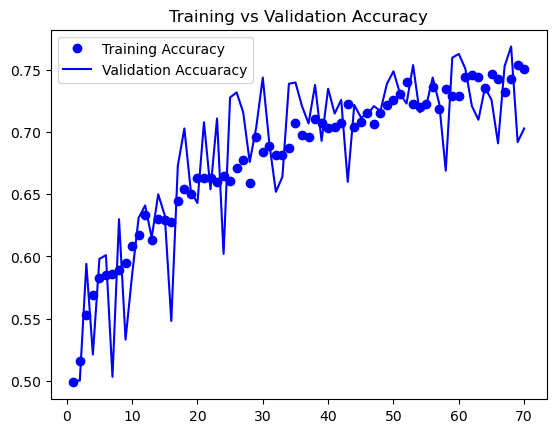

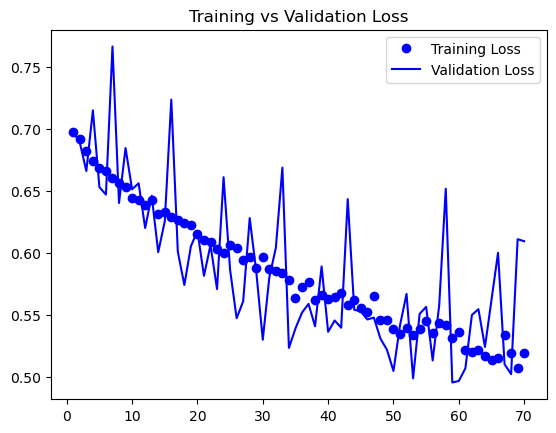

In [69]:
plot_metrics(history,model=model_with_aug)

In [70]:
model_with_aug.save('cats_dogs_small_2.h5')

# With Transfor Learning Using Pretrained Model

transfer learning is the art of using pretrained models for our computer vision takes this pretrained models have trained 
with IMAGINT (14m IMAGES and 1000 classes) and the weights are leearned dn preserved for our use. These are avilable in keras 
Aplications .Some of the process pretrained the models are VGG16 RESNET50 inception mobilenet etc in  most cases we will 
retrain pretrained models by freesing the conclutiion base and only training a fully connected classifire on the top.

In [71]:
from tensorflow.keras.applications import VGG16

In [72]:
con_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))  # go to the keras application and use the 
# different  model like in vvgg16 in mobilenet and all 

In [73]:
con_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [74]:
# instantiate a model for training
transfer_model=Sequential()
transfer_model.add(con_base)
transfer_model.add(Flatten())
transfer_model.add(Dense(258,activation='relu'))
transfer_model.add(Dense(1,activation='sigmoid'))

In [75]:
transfer_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 258)               2113794   
                                                                 
 dense_5 (Dense)             (None, 1)                 259       
                                                                 
Total params: 16,828,741
Trainable params: 16,828,741
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Freezing the convolution base
con_base.traiable=False

In [83]:
# train the VGG16 model with data aggumentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=50,
        width_shift_range=0.4,
        height_shift_range=0.4,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


test_datagen=ImageDataGenerator(rescale=1./255) #validation pictures are not to be augumented

train_generator=train_datagen.flow_from_directory(train_dir,
                                                 batch_size=20,
                                                 target_size=(150,150),
                                                 class_mode='binary')


validation_generator=test_datagen.flow_from_directory(validation_dir,
                                                 batch_size=20,
                                                 target_size=(150,150),
                                                 class_mode='binary')

transfer_model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.00002),
                      metrics=['acc'])


history=transfer_model.fit(
train_generator,
steps_per_epoch=100,
epochs=30,                     
validation_data=validation_generator,
validation_steps=50)

# this kind of training is vary costaly and would ideally requere a GPU

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 793s 8s/step - loss: 0.2548 - acc: 0.8955 - val_loss: 0.1311 - val_acc: 0.9490
Epoch 2/30
100/100 [==============================] - 796s 8s/step - loss: 0.2208 - acc: 0.9100 - val_loss: 0.1280 - val_acc: 0.9480
Epoch 3/30
100/100 [==============================] - 774s 8s/step - loss: 0.2142 - acc: 0.9160 - val_loss: 0.1144 - val_acc: 0.9540
Epoch 4/30
100/100 [==============================] - 1549s 16s/step - loss: 0.1948 - acc: 0.9195 - val_loss: 0.0866 - val_acc: 0.9700
Epoch 5/30
100/100 [==============================] - 2727s 27s/step - loss: 0.1830 - acc: 0.9295 - val_loss: 0.2130 - val_acc: 0.9340
Epoch 6/30
100/100 [==============================] - 2730s 27s/step - loss: 0.1747 - acc: 0.9330 - val_loss: 0.0946 - val_acc: 0.9640
Epoch 7/30
100/100 [==============================] - 2432s 24s/step - loss: 0.1618 - acc: 0.9335 - val_loss: 0.

Recommended Book:https://www.statlearning.com/
:https://keras.io/api/applications/

In [84]:
def plot_metrics(history,model):
    import matplotlib.pyplot as plt
    acc=transfer_model.history.history['acc']
    val_acc=transfer_model.history.history['val_acc']
    loss=transfer_model.history.history['loss']
    val_loss=transfer_model.history.history['val_loss']
    
    epochs=range(1, len(acc)+1)
    plt.plot(epochs, acc,'bo', label='Training Accuracy')
    plt.plot(epochs, val_acc,'b', label='Validation Accuaracy')
    plt.title("Training vs Validation Accuracy")
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo',label='Training Loss')
    plt.plot(epochs, val_loss,'b', label='Validation Loss')
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.show()

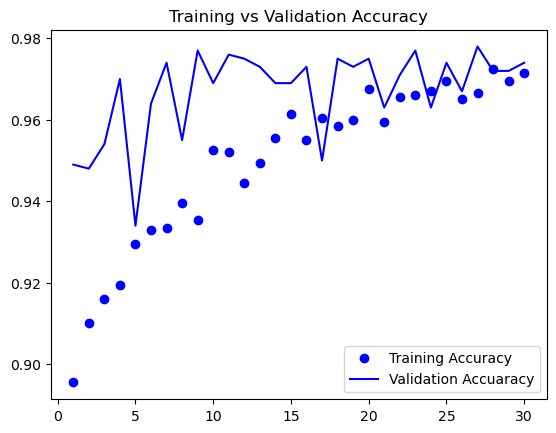

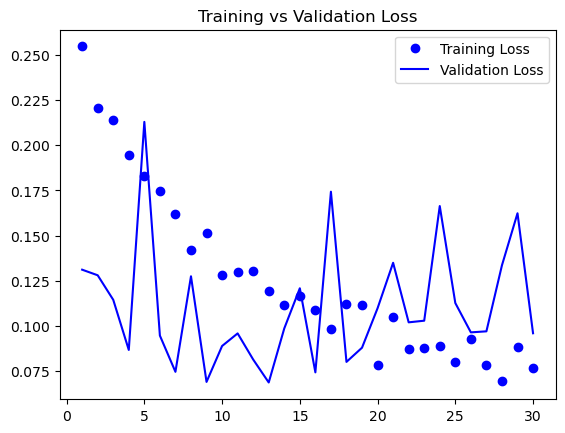

In [85]:
plot_metrics(history=history,model=transfer_model)

In [86]:
transfer_model.save('cats_dogs_small_3.h5')

# deploy the chosenmodel in streamlit

In [88]:
%%writefile app.py
import streamlit as st
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from PIL import  Image

st.title('Cat Dog Classifier')

#Step 1 : Load the model
model=load_model('cats_dogs_small_3.h5')


# Step2: Load the image to predict
file_uploaded=st.file_uploader('Choose the database', accept_multiple_files=False)
if file_uploaded is not None:
    file_name=file_uploaded
else:
    file_name='image.jpg'
    
if st.checkbox('View Image', False):
    image=Image.open(file_name)
    st.image(image)
    
#Step3: Preprocess the image
img=load_img(file_name, target_size=(150, 150))
img_array=img_to_array(img)
img_array_final=np.expand_dims(img_array, axis=0)

# Step4: Predict the image and print the result
prediction=int(model.predict(img_array_final)[0][0])
if st.button("PREDICT"):
    if prediction==1:
        st.subheader("The image is a Dog")
    else:
        st.subheader("The image is a Cat")

Writing app.py


In [90]:
%%writefile app1.py
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import streamlit as st
#step1 :load the model
model = ResNet50(weights='imagenet')

#step2: load the image
file_uploaded=st.file_uploader('Choose the database', accept_multiple_files=False)
if file_uploaded is not None:
    file_name=file_uploaded
else:
    file_name='image.jpg'
    
#step2: preprocess the image
img = image.load_img(file_name, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

#step4: get the result
preds = model.predict(x)
prediction=decode_predictions(preds, top=3)[0][0]
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
if st.button('Predict'):
    st.subheader(prediction )

Overwriting app1.py
